In [92]:
import numpy as np
import os
from collections import defaultdict
from math import log
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [46]:
class Bayes:
    def __init__(self, delta=[1, 1]):
        self.delta = delta
        
    def fit(self, X, y):
        classes, freq = defaultdict(lambda:0), defaultdict(lambda:0)
        for i in range(len(X)):
            feats, label = X[i], y[i]
            classes[label] += 1
            for feat in feats:
                freq[label, feat] += 1

        for label, feat in freq:
            freq[label, feat] /= classes[label]
        for c in classes:
            classes[c] /= len(X)

        self.classes = classes
        self.freq = freq
    
    def predict(self, X):
        classes, prob = self.classes, self.freq
        y_pred = []
        for i in range(len(X)):
            y_pred.append(max(classes.keys(), key=lambda cl: log(classes[cl] * delta[cl]) + sum(log(prob.get((cl, x), 10**(-7))) for x in X[i])))
        return y_pred

In [104]:
delta_final = 1
delta = [1, 1]
while True:
    total_fp = 0
    for j in range(1, 11):
        X_train, y_train = [], []
        X_test, y_test = [], []
        for i in range(1, 11):
            folder = 'part' + str(i)
            for filename in os.listdir(folder):
                with open(folder + '/' + filename, 'r') as f:
                    x = set()
                    if 'legit' in filename:
                        if i != j:
                            y_train.append(0)
                        else:
                            y_test.append(0)
                        for line in f:
                            for word in line.split():
                                x.add(word)
                    else:
                        if i != j:
                            y_train.append(1)
                        else:
                            y_test.append(1)
                        for line in f:
                            for word in line.split():
                                x.add(word)
                    x.remove('Subject:')
                    if i != j:
                        X_train.append(list(x))
                    else:
                        X_test.append(list(x))

        clf = Bayes(delta=delta)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        fp = 0
        for i in range(len(y_pred)):
            if y_pred[i] == 1 and y_test[i] == 0:
                fp += 1

        total_fp += fp 
        
    delta[0] *= 10
    if total_fp == 0:
        break

In [105]:
delta

[100000000000000000000000000000000000000000000000000, 1]

In [106]:
final_delta = delta

In [107]:
delta = [1, 1]
mean_acc = []
while delta != final_delta:
    for j in range(1, 11):
        acc = []
        X_train, y_train = [], []
        X_test, y_test = [], []
        for i in range(1, 11):
            folder = 'part' + str(i)
            for filename in os.listdir(folder):
                with open(folder + '/' + filename, 'r') as f:
                    x = set()
                    if 'legit' in filename:
                        if i != j:
                            y_train.append(0)
                        else:
                            y_test.append(0)
                        for line in f:
                            for word in line.split():
                                x.add(word)
                    else:
                        if i != j:
                            y_train.append(1)
                        else:
                            y_test.append(1)
                        for line in f:
                            for word in line.split():
                                x.add(word)
                    x.remove('Subject:')
                    if i != j:
                        X_train.append(list(x))
                    else:
                        X_test.append(list(x))

        clf = Bayes(delta=delta)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc.append(accuracy_score(y_pred, y_test))
        
    delta[0] *= 10
    mean_acc.append(np.array(acc).mean())

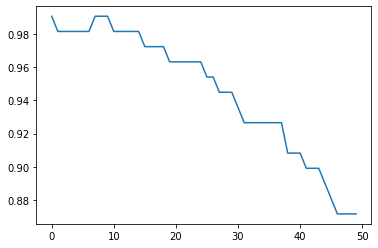

In [108]:
plt.plot(mean_acc)

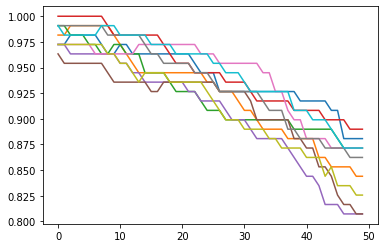

In [111]:
for j in range(1, 11):
    X_train, y_train = [], []
    X_test, y_test = [], []
    for i in range(1, 11):
        folder = 'part' + str(i)
        for filename in os.listdir(folder):
            with open(folder + '/' + filename, 'r') as f:
                x = set()
                if 'legit' in filename:
                    if i != j:
                        y_train.append(0)
                    else:
                        y_test.append(0)
                    for line in f:
                        for word in line.split():
                            x.add(word)
                else:
                    if i != j:
                        y_train.append(1)
                    else:
                        y_test.append(1)
                    for line in f:
                        for word in line.split():
                            x.add(word)
                x.remove('Subject:')
                if i != j:
                    X_train.append(list(x))
                else:
                    X_test.append(list(x))
    
    acc = []
    delta = [1, 1]
    while delta != final_delta:
        clf = Bayes(delta=delta)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc.append(accuracy_score(y_pred, y_test))
        delta[0] *= 10
    plt.plot(acc)